# Import Data

- Read 2 csv data
- Concatenate 2 csv data
- Check header and shape of data

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df1 = pd.read_csv('uji_coba.csv')
df1.head()

,id,x1,x2,x3,x4,x5,x6,label
0,ERF-4688,0,15,0.0,0,0,0,low
1,EUO-4602,0,21,0.0,0,0,0,low
2,EUR-4639,0,15,0.0,0,0,0,low
3,EVL-4548,0,16,0.0,0,0,0,low
4,EVY-4534,0,15,0.0,0,0,0,low


In [4]:
df1.shape

(25000, 8)

In [5]:
df2 = pd.read_csv('uji_coba2.csv')
df2.head()

,id,x1,x2,x3,x4,x5,x6,label
0,FIO-4449,129,120,0.9887,1050,1320,572,high
1,FIM-4450,140,271,0.9983,732,903,376,high
2,FIG-4440,651,6,0.0000,439,398,235,high
3,FIG-4447,261,195,0.9882,556,694,282,high
4,FIJ-4455,168,69,0.9948,1049,1238,528,high


In [6]:
df2.shape

(17206, 8)

In [7]:
frames = [df1, df2]
df = pd.concat(frames)
df.head()

,id,x1,x2,x3,x4,x5,x6,label
0,ERF-4688,0,15,0.0,0,0,0,low
1,EUO-4602,0,21,0.0,0,0,0,low
2,EUR-4639,0,15,0.0,0,0,0,low
3,EVL-4548,0,16,0.0,0,0,0,low
4,EVY-4534,0,15,0.0,0,0,0,low


In [8]:
df.shape

(42206, 8)

# Data Preparation

- X-Y split
- X Numerical imputation 
- X Handling outiler / Cap
- Convert Y from categoric to numeric

### X-Y Split

In [49]:
feature = ['x1','x2','x3','x4','x5','x6']

In [10]:
y = df['label']
x = df[['x1','x2','x3','x4','x5','x6']]

In [11]:
row = [0 for x in range(0,2)]
row[0] = y.shape
row[1] = x.shape
row

[(42206,), (42206, 6)]

### Numerical Imputation

In [12]:
from sklearn.preprocessing import Imputer

In [16]:
def imputNumerical(x_train_numeric):
    imput = Imputer(missing_values="NaN", strategy="median")
    imput.fit(x_train_numeric) #cari mean per column
    
    x_train_numeric_imputed = pd.DataFrame(imput.transform(x_train_numeric)) # isi dengan mean
    x_train_numeric_imputed.columns = x_train_numeric.columns
    x_train_numeric_imputed.index = x_train_numeric.index
    
    
    return x_train_numeric_imputed, imput
    

In [19]:
x_imp, imp = imputNumerical(x)

C:\Users\940088\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
x_imp.isnull().any()

x1    False
x2    False
x3    False
x4    False
x5    False
x6    False
dtype: bool

In [21]:
x_imp.isna().any()

x1    False
x2    False
x3    False
x4    False
x5    False
x6    False
dtype: bool

### Handling Outliers

In [25]:
non_zero_std = (np.std(x_imp,axis=0) !=0)
x_imp = x_imp[x_imp.columns[non_zero_std]]

In [26]:
mean_X = x_imp.mean()
std_X = x_imp.std()
up_bound =  x_imp + (3*std_X)
low_bound =  x_imp - (3*std_X)
more_than_up_bound = (x_imp > mean_X + (3*std_X))
lower_than_low_bound = (x_imp < mean_X - (3*std_X))
df_filter_cap = x_imp.mask(more_than_up_bound, up_bound, axis=1) 
df_filter_cap = df_filter_cap.mask(lower_than_low_bound, low_bound, axis=1)

In [27]:
x_cap = df_filter_cap

In [28]:
x_cap.head()

,x1,x2,x3,x4,x5,x6
0,0.0,15.0,0.0,0.0,0.0,0.0
1,0.0,21.0,0.0,0.0,0.0,0.0
2,0.0,15.0,0.0,0.0,0.0,0.0
3,0.0,16.0,0.0,0.0,0.0,0.0
4,0.0,15.0,0.0,0.0,0.0,0.0


### Change Y into numeric

In [29]:
y = y.replace('high', 1)
y = y.replace('low', 0)

In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

# Feature Engineering

- Standardization
- Categorization/Discretization (if needed)
- Train-Test split for modelling phase

### Standard Scaler

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
def standardizer(data):
    data_columns = data.columns  # agar nama column tidak hilang
    data_index = data.index # agar index tidak hilang
    normalize = StandardScaler()
    normalize.fit(data)
    
    normalize_x = pd.DataFrame(normalize.transform(data))
    normalize_x.columns = data_columns
    return normalize_x, normalize

In [91]:
x_std, normalize = standardizer(x_cap)

In [98]:
x_std.head()

,x1,x2,x3,x4,x5,x6
0,-0.61191,-0.494248,-1.225894,-0.577724,-0.61171,-0.567864
1,-0.61191,-0.348766,-1.225894,-0.577724,-0.61171,-0.567864
2,-0.61191,-0.494248,-1.225894,-0.577724,-0.61171,-0.567864
3,-0.61191,-0.470001,-1.225894,-0.577724,-0.61171,-0.567864
4,-0.61191,-0.494248,-1.225894,-0.577724,-0.61171,-0.567864


### Quantile Discretization

In [99]:
x_cat = x_std.copy()

In [100]:
label = [1, 2, 3, 4, 5]
x_cat['x1'] = pd.qcut(x_cat['x1'].rank(method='first'), q=[0, .2, .4, .6, .8, 1], labels=label)
x_cat['x2'] = pd.qcut(x_cat['x2'].rank(method='first'), q=[0, .2, .4, .6, .8, 1], labels=label)
x_cat['x3'] = pd.qcut(x_cat['x3'].rank(method='first'), q=[0, .2, .4, .6, .8, 1], labels=label)
x_cat['x4'] = pd.qcut(x_cat['x4'].rank(method='first'), q=[0, .2, .4, .6, .8, 1], labels=label)
x_cat['x5'] = pd.qcut(x_cat['x5'].rank(method='first'), q=[0, .2, .4, .6, .8, 1], labels=label)
x_cat['x6'] = pd.qcut(x_cat['x6'].rank(method='first'), q=[0, .2, .4, .6, .8, 1], labels=label)

In [101]:
x_cat.head()

,x1,x2,x3,x4,x5,x6
0,1,2,1,1,1,1
1,1,3,1,1,1,1
2,1,2,1,1,1,1
3,1,2,1,1,1,1
4,1,2,1,1,1,1


In [102]:
x_cat.isna().any()

x1    False
x2    False
x3    False
x4    False
x5    False
x6    False
dtype: bool

In [103]:
x_cat.isnull().any()

x1    False
x2    False
x3    False
x4    False
x5    False
x6    False
dtype: bool

### Train Test Split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.30, random_state=42)

In [106]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(29544, 6) (12662, 6) (29544,) (12662,)


# Exploratory Data Analysis

- Check distribution for each feature
- Check data composition in train and test data 

### Check distribution

In [107]:
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols  
import matplotlib.pyplot as plt
import numpy as np

In [108]:
data_eda = x_train.join(y_train, how='outer')
data_eda.head()

,x1,x2,x3,x4,x5,x6,label
0,-0.61191,-0.494248,-1.225894,-0.577724,-0.61171,-0.567864,0.0
0,-0.61191,-0.494248,-1.225894,-0.577724,-0.61171,-0.567864,1.0
2,-0.61191,-0.494248,-1.225894,-0.577724,-0.61171,-0.567864,0.0
3,-0.61191,-0.470001,-1.225894,-0.577724,-0.61171,-0.567864,0.0
3,-0.61191,-0.470001,-1.225894,-0.577724,-0.61171,-0.567864,1.0


In [109]:
col_num = list(x_train[feature])

In [110]:
df_num=data_eda[col_num+['label']]
for col in col_num:
    try:
        df_num[col]=df_num[col].astype(float)
    except:
        print(col)

In [111]:
df_num[col] = df_num[col].apply(pd.to_numeric, downcast='float', errors='coerce')


In [112]:
for col in col_num:
#     df_num[col]=df_num[col].fillna(np.median(df_num[~(df_num[col].isna())][col]))
    df_num[col]=df_num[col].fillna(0)

In [113]:
for col in col_num:
    df3=df_num[[col,'label']]
    res=stats.f_oneway(df3[df3.label==1][col],
                   df3[df3.label==0][col])
    print(res)

F_onewayResult(statistic=1668.689381703431, pvalue=0.0)
F_onewayResult(statistic=678.950722306221, pvalue=5.3297269798084516e-148)
F_onewayResult(statistic=132.58017317771186, pvalue=1.2985044123663584e-30)
F_onewayResult(statistic=1387.8289930244546, pvalue=6.946488029855864e-297)
F_onewayResult(statistic=1540.003325375699, pvalue=0.0)
F_onewayResult(statistic=1327.1127832009468, pvalue=2.8588192943760015e-284)


C:\Users\940088\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\940088\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


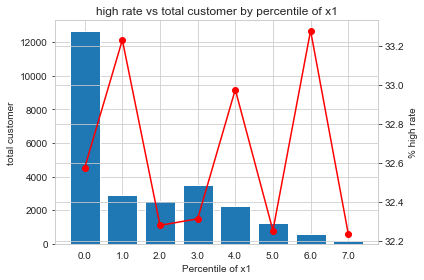

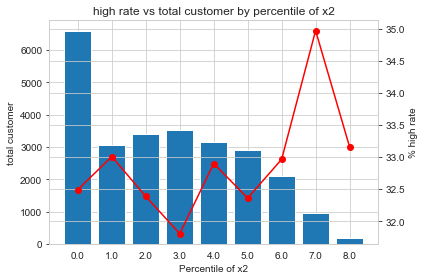

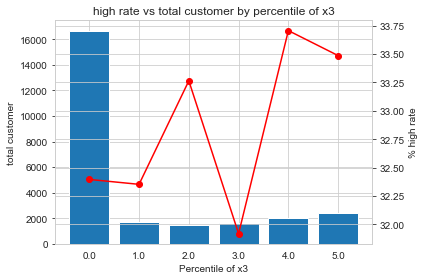

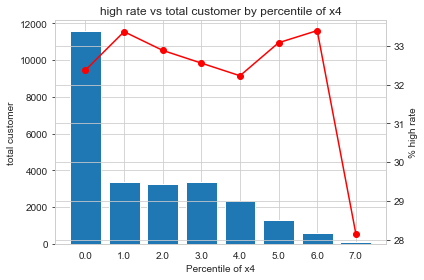

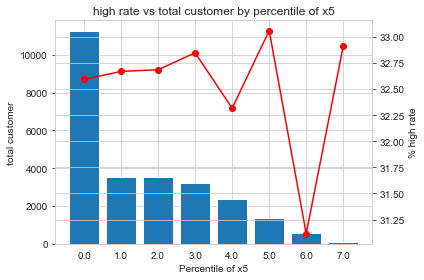

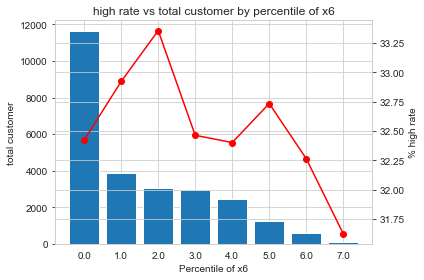

In [114]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

for var in col_num:
    n_unique = (data_eda[[var]].nunique())[0]
    df_tmp = data_eda[[var,'label']]
    
    #print(var)
    
    if n_unique <= 10:
        df_tmp[var] = df_tmp[var].astype(str)
        f = {'label':['count','sum']}
        agg = df_tmp.groupby(var).agg(f)
        agg.columns = ['total_cust', 'total_high']
        agg['high_rate'] = 100.0 * agg['total_high'] / agg['total_cust']
        x_lab = 'Category of ' + var
        p_tit = 'high rate vs total customer by ' + var
           
    else:
        df_tmp[var] = df_tmp[var].astype(float).fillna(0.0)
        df_tmp['bin'] = pd.qcut(data_eda[var], 10, labels=False, duplicates = 'drop')

        #print('Percentile:')
        percentile = df_tmp[[var]].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
        #print(percentile)
        
        f = {'label':['count','sum'], var:['min', 'max']}
        agg = df_tmp.groupby('bin').agg(f)
        agg.columns = ['total_cust', 'total_high', 'min_val', 'max_val']    
        agg['high_rate'] = 100.0 * agg['total_high'] / agg['total_cust']
        agg.index = agg.index.map(str)

        #agg.loc[:,'risk_rate'] = 100.0 * agg['total_risk'] / agg['total_cust']
        #agg.loc[:,'risk_rate'] = 100.0 * agg['total_risk'] / agg['total_cust']
        
        x_lab = 'Percentile of ' + var
        p_tit = 'high rate vs total customer by percentile of ' + var
        
    #print('\nAggregate value:')
    #print(agg)

    # grafik
    
  # grafik
    
    agg_row = agg.shape[0]
    if agg_row == 0:
        print('Only 0 category left. Iteration skipped. Graph is not created')
        print('')
        continue

    x = agg.index
    y1 = agg['total_cust']
    y2 = agg['high_rate']

    fig, ax1 = plt.subplots()
    ax1.bar(x, y1)

    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'r-', marker = 'o')

    ax1.set_xlabel(x_lab)
    ax1.set_ylabel('total customer')
    ax2.set_ylabel('% high rate')
    plt.title(p_tit)

    fig.tight_layout()

### Data Composition

In [115]:
data_train = x_train.join(y_train, how='outer')
data_test = x_test.join(y_test, how='outer')

Class 0: 17455
Class 1: 12089
Proportion: 1.44 : 1


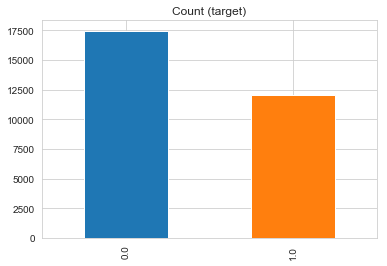

In [118]:
import numpy as np
import pandas as pd

target_count = data_train.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Class 0: 7545
Class 1: 5117
Proportion: 1.47 : 1


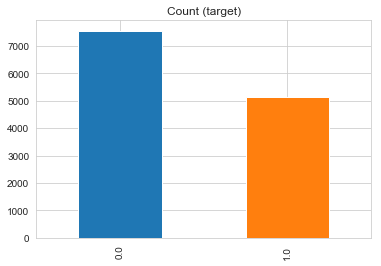

In [119]:
import numpy as np
import pandas as pd

target_count = data_test.label.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

# Building Model

- Import all package & create function for modelling
- Logistic Regression Modelling with Cross Validation
- Checek the model equation
- Evaluate model through test data

### Modelling Function

#Cross-Validation: Best Hyperparameter Evaluation

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Model Linear: Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

#Model Evaluation

In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, log_loss

#Data Manipulation

In [123]:
import pandas as pd
import numpy as np
from scipy.stats import uniform

#Plotting

In [124]:
import matplotlib.pyplot as plt

#Timer

In [125]:
import timeit

#Save-Load File

In [126]:
import pickle

#Tuning Hyperparameter using Randomized Search CV

In [127]:
def bestparam_randCV(model,hyperparam,x_train, y_train, n_iter=10):
    
    hyperparam = hyperparam
    randomizedCV = RandomizedSearchCV(model, param_distributions = hyperparam, cv = 10,
                                          n_iter = n_iter, scoring = 'roc_auc', n_jobs=-1, 
                                          random_state = 42, verbose = True)
    randomizedCV.fit(x_train, y_train)
    
    #print (randomizedCV.cv_results_)
    print ('Best ROC_AUC', randomizedCV.score(x_train, y_train))
    print ('Best Param', randomizedCV.best_params_)
    return randomizedCV

#Model Evaluation

In [128]:
def model_performace(model, x_test, y_test):
    #Make Prediction
    y_pred       = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)

    #Generate model performance
    print('')
    print(classification_report(y_test, y_pred))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('Confusion Matrix : ' + "[" + str(tp) + "," + str(fp) + "][" + str(fn) + "," + str(tn) + "]")
    print("")

    fpr,tpr,threshold = roc_curve(y_test, y_pred)
    score_auc = auc(fpr, tpr)
    score_rocauc = roc_auc_score(y_test, y_pred_proba[:,1])

    print('Accuracy      : {0:2.6f}'.format((tp+tn)*1./(tp+fp+tn+fn)))
    print('Sensitivity   : {0:2.6f}'.format((tp)*1./(tp+fn)))
    print('Spesificity   : {0:2.6f}'.format((tn)*1./(tn+fp)))
    print('Precision     : {0:2.6f}'.format((tp)*1./(tp+fp)))
    print('ROC AUC Score : {0:2.6f}'.format(score_rocauc))
    print('AUC Score     : {0:2.6f}'.format(score_auc))

    bench = y_train.value_counts(normalize=True)
    print('')
    print('Benchmark : ')
    print(bench)
    
    return fpr, tpr, score_auc, y_pred, y_pred_proba

#Cutoff Adjustment

In [129]:
def cutoff_comparison(y_test,y_pred_proba,bench,judul,step=0.025):
    y_actual        = [x for x in y_test]
    y_predict_proba = y_pred_proba[:,1]
    
    #variable to make figure
    cut  = []
    accu = [] 
    sens = []
    spec = []
    prec = []
    sauc = []
    
    #variable to choose optimum cutoff
    optimum_cut  = 0.
    optimum_acc  = 0.
    optimum_sens = 0.
    optimum_spec = 0.
    optimum_prec = 0.
    optimum_auc  = 0.
    
    for i in np.arange(0.0, 1.0, step):
        cutoff    = i
        y_predict = [1 if x>=cutoff else 0 for x in y_predict_proba]

        df = pd.DataFrame()
        df['y_predict'] = pd.Series(y_predict)
        df['y_actual']  = pd.Series(y_actual)    

        tn, fp, fn, tp  = confusion_matrix(df['y_actual'],df['y_predict']).ravel()
        accuracy        = (tp+tn)*1./(tp+fp+tn+fn)
        sensitivity     = (tp)*1./(tp+fn)
        spesificity     = (tn)*1./(tn+fp)
        precision       = (tp)*1./(tp+fp)
        logloss         = log_loss(df['y_actual'], df['y_predict'])

        score_rocauc      = roc_auc_score(df['y_actual'], df['y_predict'])
        fpr,tpr,threshold = roc_curve(df['y_actual'], df['y_predict'])
        score_auc         = auc(fpr, tpr)

        #print('       Confusion Matrix : ' + "[" + str(tp) + "," + str(fp) + "][" + str(fn) + "," + str(tn) + "]")
        #print("{0:2.4f}, Accuracy {1:2.6f}, Sensitivity {2:2.6f}, Spesificity {3:2.6f}, Precision {4:2.6f}, ROC AUC {5:2.6f}, AUC {6:2.6f}\
        #      ".format(i,accuracy,sensitivity,spesificity,precision,score_rocauc,score_auc)
        #     )
        
        #Finding Optimum Cutoff
        if(accuracy>bench and score_auc>0.7):
            if(cutoff>optimum_cut):
                optimum_cut  = cutoff
                optimum_acc  = accuracy
                optimum_sens = sensitivity
                optimum_spec = spesificity
                optimum_prec = precision
                optimum_auc  = score_auc
        
        #Storing data to make figure
        cut.append(cutoff)
        accu.append(accuracy)
        sens.append(sensitivity)
        spec.append(spesificity)
        prec.append(precision)
        sauc.append(score_auc)
        
    #Make Figure
    plt.figure(figsize=(20,10))
    lw = 4
    lwb = 3
    
    plt.plot([-0.02, 1.0], [bench, bench], color='#3399f0', lw=lwb, linestyle=':', label='Benchmark Accuracy %0.6f' % bench)
    plt.plot(cut, accu, color='#3399f0', lw=lw, label='Optimum Accuracy %0.6f' % optimum_acc)
    plt.plot(cut, sens, color='#09fe93', lw=lw, label='Optimum Sensitivity %0.6f' % optimum_sens)
    plt.plot(cut, spec, color='#abcd22', lw=lw, label='Optimum Spesificity %0.6f)' % optimum_spec)
    plt.plot(cut, prec, color='#e231ab', lw=lw, label='Optimum Precision %0.6f)' % optimum_prec)
    plt.plot([-0.02, 1.0], [0.7, 0.7], color='#f0321f', lw=lwb, linestyle=':', label='Benchmark AUC %0.6f' % 0.700000)
    plt.plot(cut, sauc, color='#f0321f', lw=lw, label='Optimum AUC %0.6f' % optimum_auc)
    
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Threshold')
    plt.ylabel('Value')
    plt.xticks(np.arange(0.0, 1.0, step=0.05))
    plt.yticks(np.arange(0.0, 1.0, step=0.05))
    plt.title(judul + '\n Model Performance vs Threshold \n (optimum cutoff = %0.4f)' % optimum_cut)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    #Print Optimum Values
    print("optimum_cut {0:2.4f}, optimum_acc {1:2.6f}, optimum_sens {2:2.6f}, optimum_spec {3:2.6f}, optimum_prec {4:2.6f}, optimum_auc {5:2.6f}          ".format(optimum_cut,optimum_acc,optimum_sens,optimum_spec,optimum_prec,optimum_auc)
         )
    
    return optimum_cut, optimum_acc, optimum_sens, optimum_spec, optimum_prec, optimum_auc


#Plot Curve Performance: ROC, KS, Gain, Lift     

In [130]:
import scikitplot as skplt
from scikitplot.helpers import binary_ks_curve
from scikitplot.helpers import cumulative_gain_curve
from scipy import stats

def plot_curve(y_actual, y_proba, judul, chartname = 'ROC'):
    plt.figure(figsize=(20,10))
    
    if(chartname == 'ROC'):
        aucroc_score     = roc_auc_score(y_actual, y_proba[:,1])
        skplt.metrics.plot_roc(y_actual, y_proba, plot_micro=False,plot_macro=False, 
                               title='ROC Curve for variable segment_score_group\nArea under Curve = %0.4f' % aucroc_score,
                               title_fontsize = 16, text_fontsize = 12)
    if(chartname == 'KS'):
        thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(y_actual, y_proba[:,1].ravel())
        skplt.metrics.plot_ks_statistic(y_actual, y_proba,
                                        title='KS Chart for variable segment_score_group\nKS Statistic = %0.4f' % (ks_statistic*100),
                                        title_fontsize = 16, text_fontsize = 12)
    if(chartname == 'GAIN'):
        percentages, gains = cumulative_gain_curve(y_actual, y_proba[:,1])
        skplt.metrics.plot_cumulative_gain(y_actual, y_proba, 
                                           title='Gain Chart for variable segment_score_group\nArea under Gain Curve = %0.4f' % auc(percentages, gains), 
                                           title_fontsize = 16, text_fontsize = 12)
    if(chartname == 'LIFT'):
        skplt.metrics.plot_lift_curve(y_actual, y_proba,
                                      title='Lift Chart for variable segment_score_group', 
                                      title_fontsize = 16, text_fontsize = 12)    
    
    ### Save Figure
    #plt.savefig(folder_performance+'Performance '+ judul +' '+ chartname +'.png')

    ### Show Figure  
    plt.show()

### Logistic Regression

In [131]:
start_time = timeit.default_timer()

In [132]:
x_train.shape

(29544, 6)

In [133]:
y_train.shape

(29544,)

#Evaluating The Best Hyperparameter

In [134]:
logit      = LogisticRegression()
hyperparam = {'penalty': ['l1', 'l2'],
              'C': uniform(loc=0, scale=4)}
best_logit = bestparam_randCV(logit, hyperparam, x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.5s finished
C:\Users\940088\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best ROC_AUC 0.974577843943109
Best Param {'C': 0.22564631610840102, 'penalty': 'l2'}


#Initialize Classifier with Best Hyperparamater

In [135]:
logit = LogisticRegression(C            = best_logit.best_params_.get('C'), 
                           penalty      = best_logit.best_params_.get('penalty'), 
                           random_state = 42)

#Run Model

In [136]:
result_logit = logit.fit(x_train, y_train)

C:\Users\940088\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Equation

In [137]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(logit.coef_))], axis = 1)
coefficients.columns = ['feature', 'coef']
coefficients

,feature,coef
0,x1,2.256514
1,x2,2.259207
2,x3,0.116909
3,x4,0.395414
4,x5,4.470080
5,x6,-1.130801


### Evaluate / Generate model performance

In [139]:
###from data train
fpr_logit0, tpr_logit0, score_auc_logit0, y_pred_logit0, y_pred_proba_logit0 = model_performace(logit,x_train,y_train)

elapsed = (timeit.default_timer() - start_time)/60.
print('')
print('Elapsed time for LOGIT {0:6.6f} min'.format(elapsed))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92     17455
           1       0.91      0.86      0.89     12089

   micro avg       0.91      0.91      0.91     29544
   macro avg       0.91      0.90      0.90     29544
weighted avg       0.91      0.91      0.91     29544

Confusion Matrix : [10448,1053][1641,16402]

Accuracy      : 0.908814
Sensitivity   : 0.864257
Spesificity   : 0.939673
Precision     : 0.908443
ROC AUC Score : 0.974578
AUC Score     : 0.901965

Benchmark : 
0    0.590814
1    0.409186
Name: label, dtype: float64

Elapsed time for LOGIT 5.731588 min


In [140]:
###from data test
fpr_logit1, tpr_logit1, score_auc_logit1, y_pred_logit1, y_pred_proba_logit1 = model_performace(logit,x_test,y_test)

elapsed = (timeit.default_timer() - start_time)/60.
print('')
print('Elapsed time for LOGIT {0:6.6f} min'.format(elapsed))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7545
           1       0.91      0.86      0.88      5117

   micro avg       0.91      0.91      0.91     12662
   macro avg       0.91      0.90      0.90     12662
weighted avg       0.91      0.91      0.91     12662

Confusion Matrix : [4407,459][710,7086]

Accuracy      : 0.907677
Sensitivity   : 0.861247
Spesificity   : 0.939165
Precision     : 0.905672
ROC AUC Score : 0.974342
AUC Score     : 0.900206

Benchmark : 
0    0.590814
1    0.409186
Name: label, dtype: float64

Elapsed time for LOGIT 5.745227 min


<Figure size 1440x720 with 0 Axes>

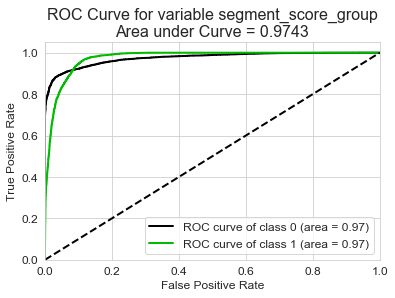

<Figure size 1440x720 with 0 Axes>

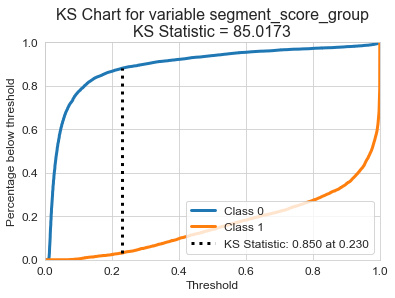

C:\Users\940088\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 1440x720 with 0 Axes>

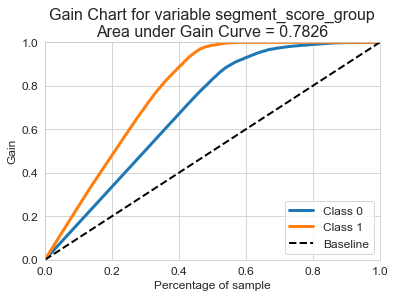

C:\Users\940088\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 1440x720 with 0 Axes>

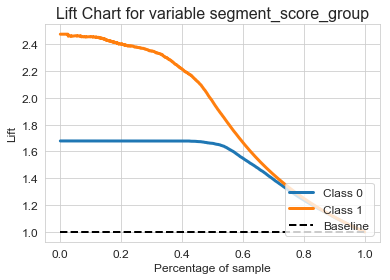

In [141]:
# Ploting ROC, KS, Gain, Lift Testing Data
judul = 'LOGISTIC TEST'
plot_curve(y_test, y_pred_proba_logit1, judul, chartname = 'ROC')
plot_curve(y_test, y_pred_proba_logit1, judul, chartname = 'KS')
plot_curve(y_test, y_pred_proba_logit1, judul, chartname = 'GAIN')
plot_curve(y_test, y_pred_proba_logit1, judul, chartname = 'LIFT')

# Predict

- Create prediction & probability
- export result set

### Create prediction and probability column

In [143]:
y_predict = logit.predict(x_std)
y_prob = logit.predict_proba(x_std)
df['y_predict'] = y_predict
df['y_prob_low'] = y_prob[:,0]
df['y_prob_high'] = y_prob[:,1]
df.head(5)

,id,x1,x2,x3,x4,x5,x6,label,y_predict,y_prob_low,y_prob_high
0,ERF-4688,0,15,0.0,0,0,0,low,0,0.986138,0.013862
1,EUO-4602,0,21,0.0,0,0,0,low,0,0.980848,0.019152
2,EUR-4639,0,15,0.0,0,0,0,low,0,0.986138,0.013862
3,EVL-4548,0,16,0.0,0,0,0,low,0,0.985369,0.014631
4,EVY-4534,0,15,0.0,0,0,0,low,0,0.986138,0.013862


### Export result to CSV

In [144]:
df.to_csv('final_result.csv')